#     BIG BLACK MONEY DATASET ANALYSIS PROJECT

#            Introduction

This dataset is valuable for analyzing suspicious financial activities and identifying patterns that may indicate money laundering. By examining factors like transaction types, countries involved, risk scores, and the use of shell companies, it provides insights into high-risk transactions and potential money laundering trends.


# Column Name Description

Transaction ID- A unique identifier for each transaction.

Country- The country where the transaction originated.

Amount (USD)- The monetary value of the transaction in US dollars.

Transaction Type- The nature of the transaction.

Date of Transaction- The date and timestamp when the transaction occurred.

Person Involved- The individual associated with the transaction.

Industry- The industry related to the transaction, such as construction, luxury goods, or real estate.

Destination Country- The country to which the transaction is directed.

Reported by Authority- A boolean indicating if the transaction was flagged by authorities.

Source of Money- Indicates whether the source of funds is legal or illegal.

Money Laundering Risk Score- A score assessing the risk of money laundering.

Shell Companies Involved- The number of shell companies used in the transaction.

Financial Institution- The bank or financial institution through which the transaction was conducted.

Tax Haven Country- The tax haven country involved, which may indicate attempts to hide the origin of funds.



#          Assumptions for this analysis

1. Which industries are used most among every country ?
2. Which transaction method is mostly used ?
3. Are transactions originating from specific countries associated with higher risk scores?
4. How does the source of money (legal vs. illegal) affect the transaction type ?
5. Which countries have the highest number of transactions involving tax haven destinations?
6. How does the number of shell companies vary across different countries ?
7. What is the average transaction amount for legal versus illegal transactions?
8. How many transactions were flagged by authorities, and how does this compare across different countries?
9. Which financial institutions are the most common for transactions involving tax haven countries?
10. Which transaction type had the highest money laundering risk score?


#     Importing all the necessary libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
                                                              

#    Data reading and understanding


In [224]:
df=pd.read_csv("C:\\datascience\\notes\\New folder\\Big_Black_Money_Dataset.csv")
print(df)

     Transaction ID       Country  Amount (USD)   Transaction Type  \
0      TX0000000001        Brazil  3.267530e+06  Offshore Transfer   
1      TX0000000002         China  4.965767e+06    Stocks Transfer   
2      TX0000000003            UK  9.416750e+04    Stocks Transfer   
3      TX0000000004           UAE  3.864201e+05    Cash Withdrawal   
4      TX0000000005  South Africa  6.433784e+05     Cryptocurrency   
...             ...           ...           ...                ...   
9995   TX0000009996     Singapore  2.209229e+06  Offshore Transfer   
9996   TX0000009997           UAE  4.800338e+06  Property Purchase   
9997   TX0000009998            UK  4.891953e+05    Stocks Transfer   
9998   TX0000009999        Brazil  2.233581e+06  Offshore Transfer   
9999   TX0000010000   Switzerland  3.846778e+05    Stocks Transfer   

      Date of Transaction Person Involved      Industry Destination Country  \
0     2013-01-01 00:00:00     Person_1101  Construction                 USA   
1

#   Avoiding extra rows

In [225]:
df=df.sample(2000).reset_index()
df.head(10)

,index,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,343,TX0000000344,China,1.642131e+06,Offshore Transfer,2013-01-15 07:00:00,Person_6537,Luxury Goods,India,False,Illegal,8,8,Bank_377,Switzerland
1,4232,TX0000004233,UAE,1.181653e+06,Offshore Transfer,2013-06-26 08:00:00,Person_8841,Real Estate,Switzerland,False,Illegal,8,4,Bank_185,Cayman Islands
2,3763,TX0000003764,China,4.436214e+05,Cryptocurrency,2013-06-06 19:00:00,Person_6411,Casinos,China,False,Illegal,9,1,Bank_325,Bahamas
3,7344,TX0000007345,UK,3.547704e+06,Property Purchase,2013-11-03 00:00:00,Person_9048,Finance,India,True,Illegal,2,0,Bank_81,Switzerland
4,2940,TX0000002941,USA,3.466166e+06,Offshore Transfer,2013-05-03 12:00:00,Person_4051,Luxury Goods,UK,False,Illegal,7,7,Bank_261,Singapore
5,1880,TX0000001881,Russia,2.433205e+06,Offshore Transfer,2013-03-20 08:00:00,Person_8399,Luxury Goods,UK,True,Legal,9,6,Bank_497,Bahamas
6,8918,TX0000008919,Switzerland,3.791794e+06,Cash Withdrawal,2014-01-07 14:00:00,Person_7473,Real Estate,UAE,False,Legal,2,8,Bank_272,Luxembourg
7,226,TX0000000227,Singapore,3.746944e+06,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,9,5,Bank_200,Luxembourg
8,7937,TX0000007938,UAE,4.762711e+06,Offshore Transfer,2013-11-27 17:00:00,Person_2500,Real Estate,Brazil,False,Illegal,9,7,Bank_21,Cayman Islands
9,1408,TX0000001409,Russia,7.034317e+05,Property Purchase,2013-02-28 16:00:00,Person_3120,Finance,Russia,False,Illegal,8,8,Bank_90,Bahamas


In [226]:
df.tail(10)

,index,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
1990,1980,TX0000001981,China,7.238814e+05,Cash Withdrawal,2013-03-24 12:00:00,Person_3182,Luxury Goods,Singapore,True,Illegal,10,1,Bank_362,Luxembourg
1991,5245,TX0000005246,Singapore,3.484863e+06,Cryptocurrency,2013-08-07 13:00:00,Person_671,Arms Trade,South Africa,True,Legal,6,2,Bank_366,Bahamas
1992,4662,TX0000004663,China,8.343235e+05,Offshore Transfer,2013-07-14 06:00:00,Person_3834,Oil & Gas,South Africa,False,Illegal,10,3,Bank_91,Luxembourg
1993,1838,TX0000001839,South Africa,4.297813e+05,Property Purchase,2013-03-18 14:00:00,Person_8235,Arms Trade,Singapore,False,Illegal,5,9,Bank_375,Luxembourg
1994,6114,TX0000006115,Switzerland,2.557140e+06,Stocks Transfer,2013-09-12 18:00:00,Person_691,Arms Trade,Switzerland,False,Legal,10,3,Bank_235,Luxembourg
1995,5370,TX0000005371,South Africa,2.651881e+06,Cryptocurrency,2013-08-12 18:00:00,Person_1067,Real Estate,Brazil,False,Legal,2,5,Bank_486,Bahamas
1996,5533,TX0000005534,South Africa,2.420056e+06,Cash Withdrawal,2013-08-19 13:00:00,Person_8965,Construction,India,True,Legal,10,5,Bank_357,Bahamas
1997,2735,TX0000002736,Brazil,3.352656e+06,Offshore Transfer,2013-04-24 23:00:00,Person_1506,Oil & Gas,UAE,False,Illegal,4,5,Bank_215,Bahamas
1998,7501,TX0000007502,Brazil,7.301115e+05,Offshore Transfer,2013-11-09 13:00:00,Person_6125,Arms Trade,Singapore,False,Illegal,3,5,Bank_65,Luxembourg
1999,3193,TX0000003194,South Africa,1.780194e+06,Stocks Transfer,2013-05-14 01:00:00,Person_3489,Casinos,Russia,False,Illegal,4,5,Bank_190,Singapore


#  Checking Datatypes

In [227]:
df.dtypes

index                            int64
Transaction ID                  object
Country                         object
Amount (USD)                   float64
Transaction Type                object
Date of Transaction             object
Person Involved                 object
Industry                        object
Destination Country             object
Reported by Authority             bool
Source of Money                 object
Money Laundering Risk Score      int64
Shell Companies Involved         int64
Financial Institution           object
Tax Haven Country               object
dtype: object

In [228]:
df.describe()

,index,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,5046.482500,2.539207e+06,5.539000,4.465500
std,2852.902345,1.421147e+06,2.922627,2.870179
min,4.000000,1.288525e+04,1.000000,0.000000
25%,2656.750000,1.305210e+06,3.000000,2.000000
50%,5077.000000,2.558757e+06,6.000000,4.000000
75%,7455.250000,3.774173e+06,8.000000,7.000000
max,9988.000000,4.999461e+06,10.000000,9.000000


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        2000 non-null   int64  
 1   Transaction ID               2000 non-null   object 
 2   Country                      2000 non-null   object 
 3   Amount (USD)                 2000 non-null   float64
 4   Transaction Type             2000 non-null   object 
 5   Date of Transaction          2000 non-null   object 
 6   Person Involved              2000 non-null   object 
 7   Industry                     2000 non-null   object 
 8   Destination Country          2000 non-null   object 
 9   Reported by Authority        2000 non-null   bool   
 10  Source of Money              2000 non-null   object 
 11  Money Laundering Risk Score  2000 non-null   int64  
 12  Shell Companies Involved     2000 non-null   int64  
 13  Financial Institut

In [230]:
df.columns

Index(['index', 'Transaction ID', 'Country', 'Amount (USD)',
       'Transaction Type', 'Date of Transaction', 'Person Involved',
       'Industry', 'Destination Country', 'Reported by Authority',
       'Source of Money', 'Money Laundering Risk Score',
       'Shell Companies Involved', 'Financial Institution',
       'Tax Haven Country'],
      dtype='object')

#    Checking null values

In [231]:
df.isnull().sum()

index                          0
Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

In [232]:
df.reset_index(drop=True,inplace=True)
print(df.to_string())

      index Transaction ID       Country  Amount (USD)   Transaction Type  Date of Transaction Person Involved      Industry Destination Country  Reported by Authority Source of Money  Money Laundering Risk Score  Shell Companies Involved Financial Institution Tax Haven Country
0       343   TX0000000344         China  1.642131e+06  Offshore Transfer  2013-01-15 07:00:00     Person_6537  Luxury Goods               India                  False         Illegal                            8                         8              Bank_377       Switzerland
1      4232   TX0000004233           UAE  1.181653e+06  Offshore Transfer  2013-06-26 08:00:00     Person_8841   Real Estate         Switzerland                  False         Illegal                            8                         4              Bank_185    Cayman Islands
2      3763   TX0000003764         China  4.436214e+05     Cryptocurrency  2013-06-06 19:00:00     Person_6411       Casinos               China                  F

In [233]:
# Count the number of transactions where 'Reported by Authority' is TRUE
flagged_transactions = df[df['Reported by Authority'] == True].shape[0]
print(f"Number of flagged transactions: {flagged_transactions}")



Number of flagged transactions: 436


#  Which industries are used most among every country

Most common industries are:
Finance         307
Luxury Goods    291
Construction    289
Casinos         288
Real Estate     287
Name: Industry, dtype: int64


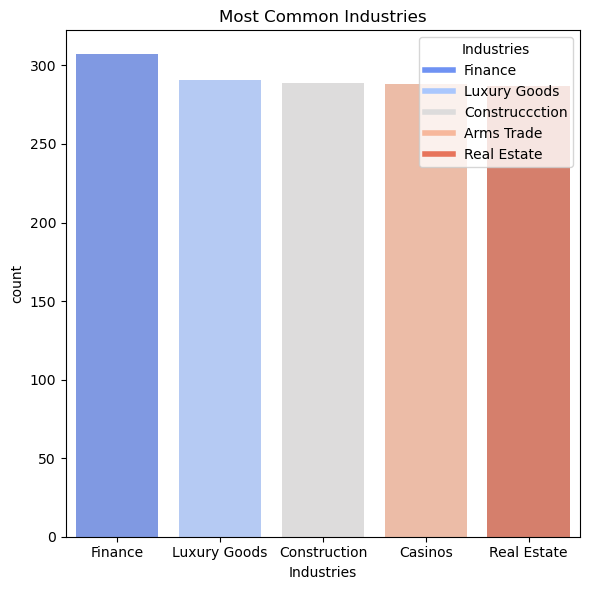

In [234]:
industry_count = df['Industry'].value_counts().head()
print("Most common industries are:")
print(industry_count)

plt.figure(figsize=(6,6))
sns.barplot(x=industry_count.index,y=industry_count.values,palette='coolwarm')
legend_labels=['Finance','Luxury Goods','Construccction','Arms Trade','Real Estate']
handles=[plt.Line2D([0],[0],color=color,lw=4)for color in sns.color_palette('coolwarm',5)]
plt.legend(handles,legend_labels,title='Industries')
plt.xticks(rotation=0)
plt.title('Most Common Industries')
plt.xlabel('Industries')
plt.ylabel('count')
plt.tight_layout()
plt.show()


It reveals that the Finance industries are commonly used by every country.

#  which transaction method is mostly used ?

Transaction method mostly used:     Offshore Transfer    420
Property Purchase    402
Cash Withdrawal      402
Cryptocurrency       395
Stocks Transfer      381
Name: Transaction Type, dtype: int64


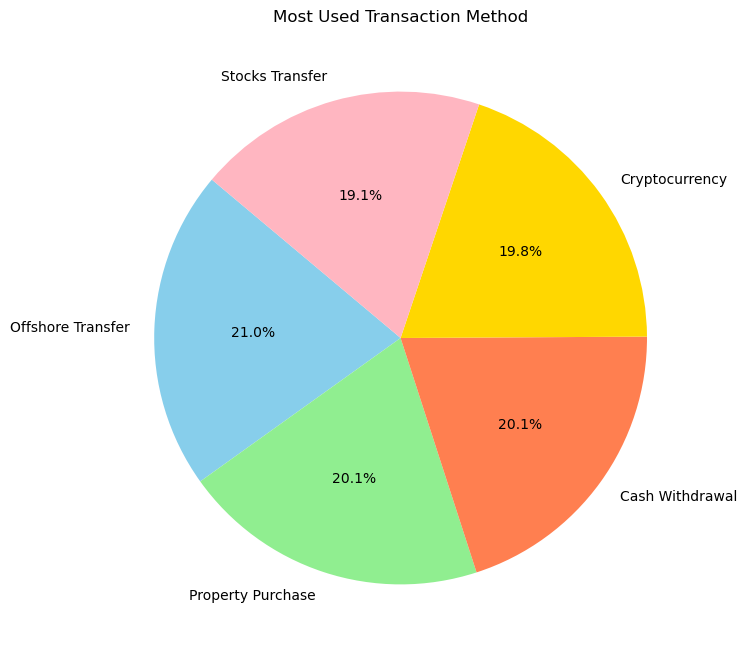

In [235]:
transaction_method_count = df['Transaction Type'].value_counts()
most_used_transaction_method = transaction_method_count.idxmax()
most_used_transaction_method
print(f"Transaction method mostly used:     {transaction_method_count}")

plt.figure(figsize=(8, 8))
transaction_method_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'coral', 'gold', 'lightpink'])
plt.title('Most Used Transaction Method')
plt.ylabel('')  
plt.show()



We can see that Property Purchase is the most used transaction method

# Are transactions originating from specific countries associated with higher risk scores?

Average Money Laundering Risk Score by Country:
 Country
UK              5.798165
Switzerland     5.744565
Singapore       5.685567
USA             5.655172
Brazil          5.609524
UAE             5.509901
Russia          5.470588
South Africa    5.311828
India           5.302083
China           5.280193
Name: Money Laundering Risk Score, dtype: float64


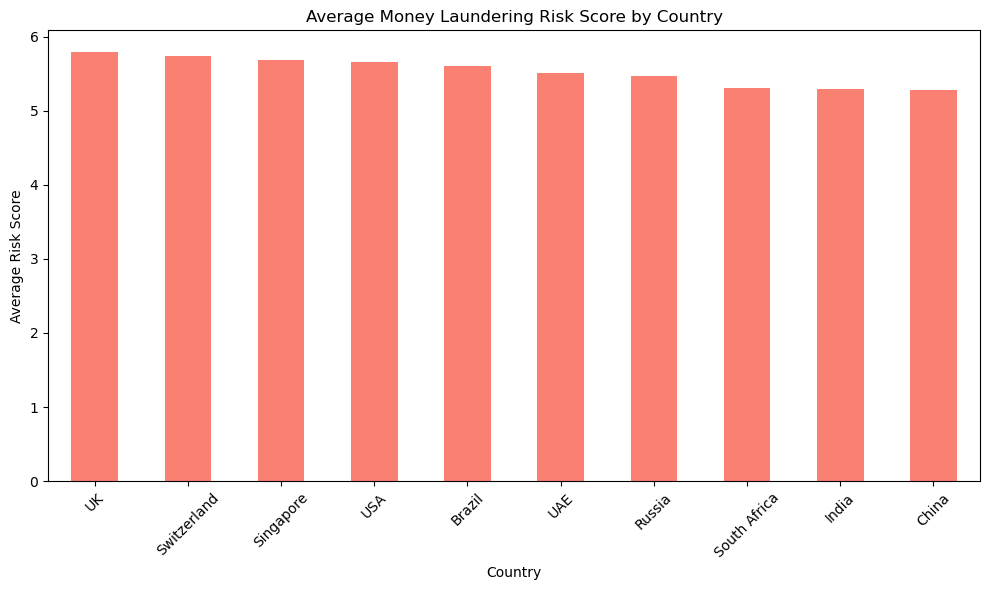

In [236]:

country_risk_scores = df.groupby('Country')['Money Laundering Risk Score'].mean().sort_values(ascending=False)
print("Average Money Laundering Risk Score by Country:\n", country_risk_scores)
plt.figure(figsize=(10, 6))
country_risk_scores.plot(kind='bar', color='salmon')
plt.title('Average Money Laundering Risk Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Risk Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Transaction originating from specific countries creates a higher risk score. In the graph we can see  the average money laundering risk score of every countries.

# How does the source of money (legal vs. illegal) affect the transaction type ?

Number of legal transactions: 599
Number of illegal transactions: 1401


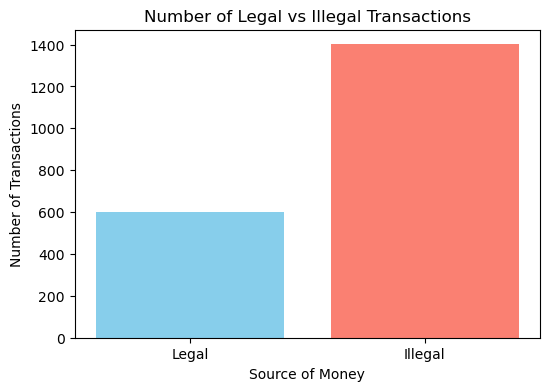

In [237]:

legal_transactions = df[df['Source of Money'] == 'Legal'].shape[0]
illegal_transactions = df[df['Source of Money'] == 'Illegal'].shape[0]
print(f"Number of legal transactions: {legal_transactions}")
print(f"Number of illegal transactions: {illegal_transactions}")

plt.figure(figsize=(6, 4))
plt.bar(['Legal', 'Illegal'], [legal_transactions, illegal_transactions], color=['skyblue', 'salmon'])
plt.title('Number of Legal vs Illegal Transactions')
plt.xlabel('Source of Money')
plt.ylabel('Number of Transactions')
plt.show()


 This visual representation effectively highlights the imbalance between the two categories of transaction sources, indicating a greater prevalence of transactions originating from illegal source

#  Which countries have the highest number of transactions involving tax haven destinations?

Countries with the highest number of transactions involving tax haven destinations:
        Country  Tax Haven Transaction Count
0            UK                          218
1        Brazil                          210
2         China                          207
3        Russia                          204
4           USA                          203
5           UAE                          202
6     Singapore                          194
7         India                          192
8  South Africa                          186
9   Switzerland                          184


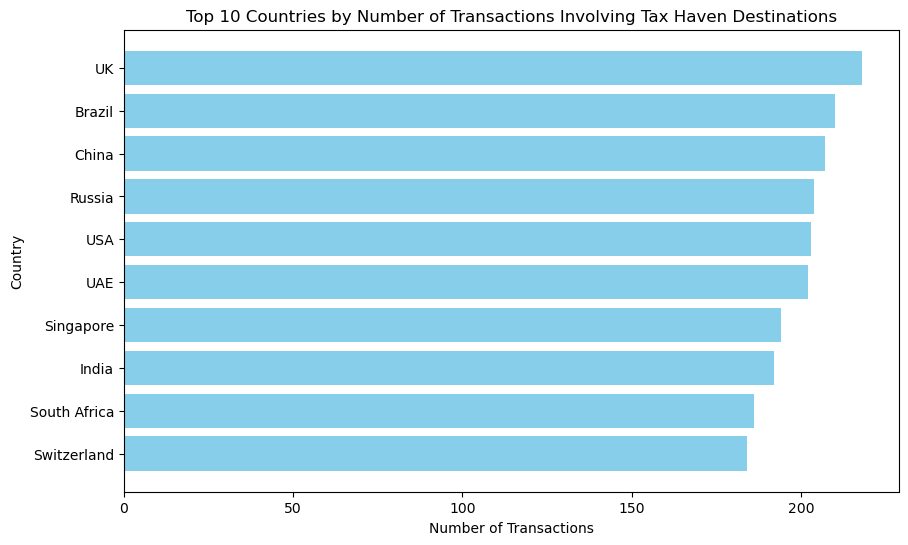

In [238]:
tax_haven_transactions = df[df['Tax Haven Country'].notna()]
tax_haven_count_by_country = tax_haven_transactions['Country'].value_counts().reset_index()
tax_haven_count_by_country.columns = ['Country', 'Tax Haven Transaction Count']
print("Countries with the highest number of transactions involving tax haven destinations:")
print(tax_haven_count_by_country)

plt.figure(figsize=(10, 6))
plt.barh(tax_haven_count_by_country['Country'].head(10), 
         tax_haven_count_by_country['Tax Haven Transaction Count'].head(10), color='skyblue')
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.title("Top 10 Countries by Number of Transactions Involving Tax Haven Destinations")
plt.gca().invert_yaxis()  
plt.show()




This analysis can provide insights into geographical trends in offshore financial transactions and identify potential hotspots for tax haven usage. 

#  How does the number of shell companies vary across different countries ?

Total Number of shell companies involved
        Country  Average Shell Companies  Total Shell Companies
0        Brazil                 4.580952                    962
1         China                 4.521739                    936
2         India                 3.973958                    763
3        Russia                 4.318627                    881
4     Singapore                 4.510309                    875
5  South Africa                 4.440860                    826
6   Switzerland                 4.679348                    861
7           UAE                 4.559406                    921
8            UK                 4.307339                    939
9           USA                 4.763547                    967


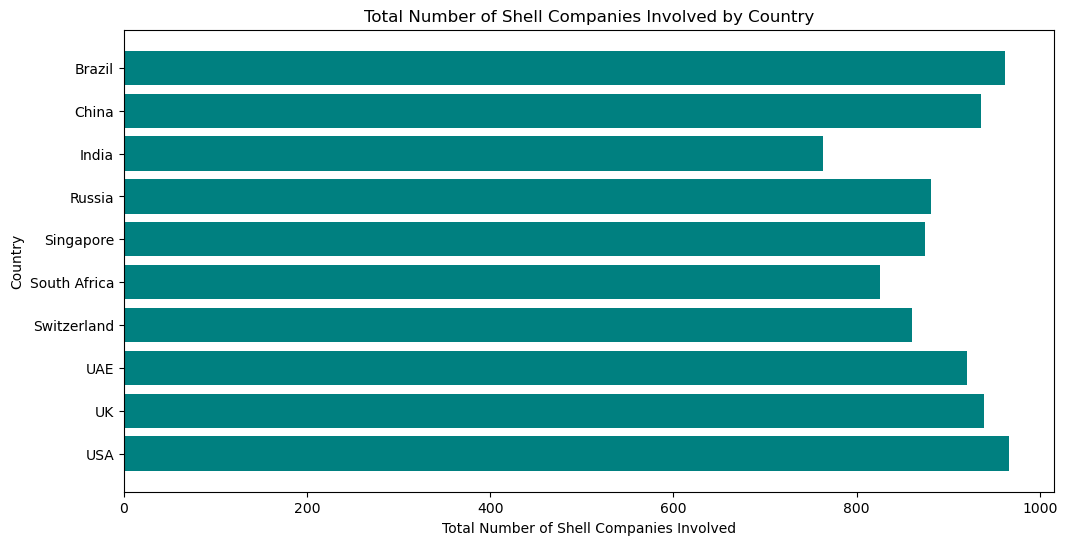

In [239]:
shell_companies_by_country = df.groupby('Country')['Shell Companies Involved'].agg(['mean', 'sum']).reset_index()
shell_companies_by_country.columns = ['Country', 'Average Shell Companies', 'Total Shell Companies']
print("Total Number of shell companies involved")
print(shell_companies_by_country)

plt.figure(figsize=(12, 6))
plt.barh(shell_companies_by_country['Country'], shell_companies_by_country['Total Shell Companies'], color='teal')
plt.xlabel('Total Number of Shell Companies Involved')
plt.ylabel('Country')
plt.title('Total Number of Shell Companies Involved by Country')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()


Here the graph shows a high total number of shell companies by country that indicate areas with a higher frequency of transactions involving shell companies.

#  What is the average transaction amount for legal versus illegal transactions?

Source of Money
Illegal    2.500181e+06
Legal      2.630484e+06
Name: Amount (USD), dtype: float64


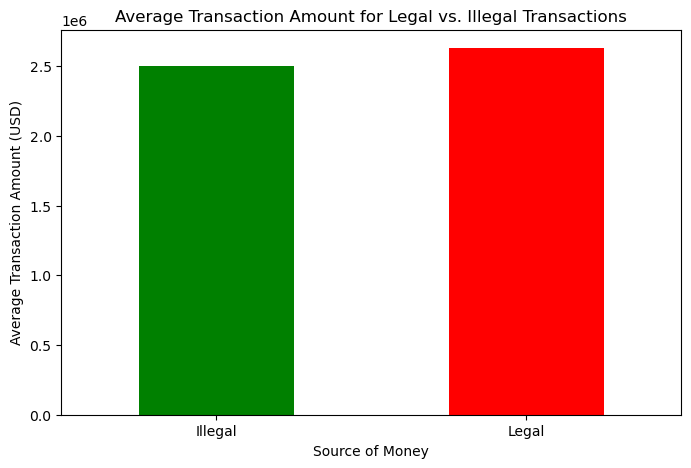

In [240]:
average_amounts = df.groupby('Source of Money')['Amount (USD)'].mean()
print(average_amounts)

plt.figure(figsize=(8, 5))
average_amounts.plot(kind='bar', color=['green', 'red'])
plt.title('Average Transaction Amount for Legal vs. Illegal Transactions')
plt.xlabel('Source of Money')
plt.ylabel('Average Transaction Amount (USD)')
plt.xticks(rotation=0)
plt.show()


This method provides a clear visual representation of how average transaction sizes vary between legal and illegal transactions.

# How many transactions were flagged by authorities, and how does this compare across different countries?

Number of Flagged Transactions by Country:
Country
UK              57
China           50
Singapore       46
Switzerland     46
UAE             46
Russia          45
South Africa    42
USA             37
Brazil          34
India           33
dtype: int64


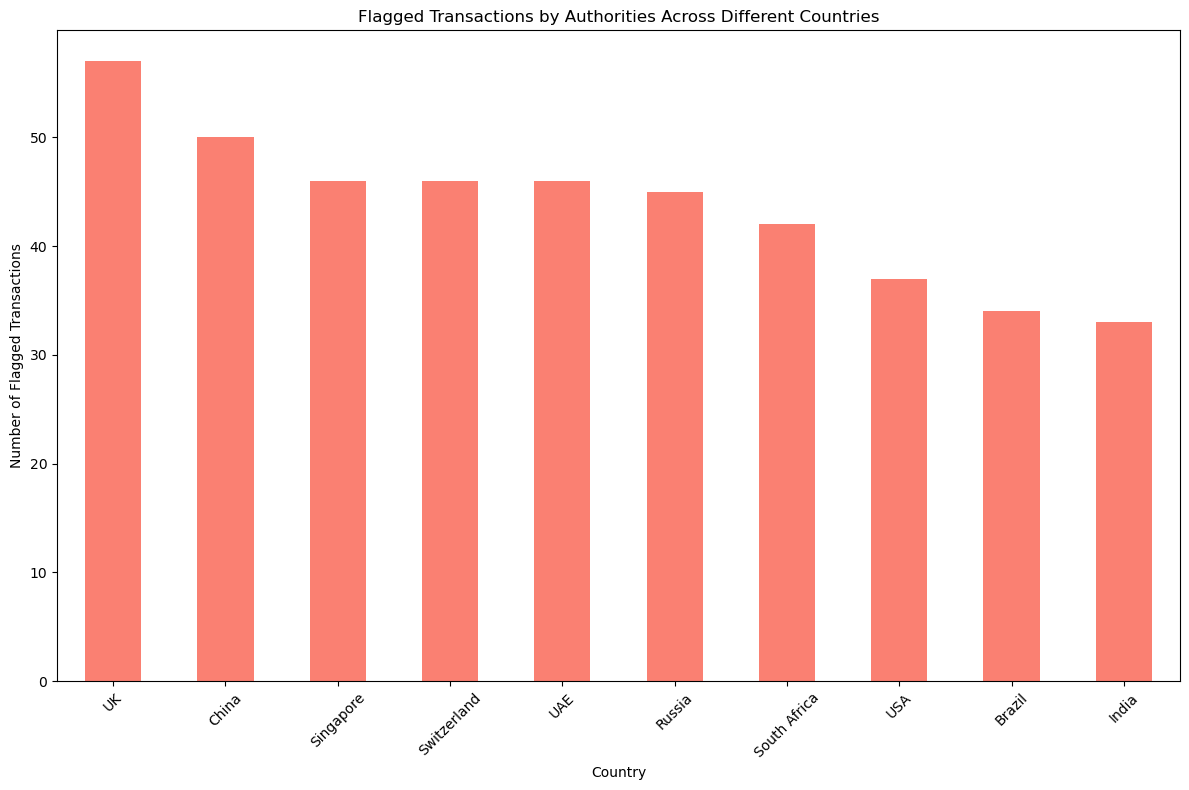

In [241]:
flagged_transactions = df[df['Reported by Authority'] == True]
flagged_by_country = flagged_transactions.groupby('Country').size().sort_values(ascending=False)
print("Number of Flagged Transactions by Country:")
print(flagged_by_country)

plt.figure(figsize=(12, 8))
flagged_by_country.plot(kind='bar', color='salmon')
plt.title('Flagged Transactions by Authorities Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Flagged Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This analysis will give a clear overview of how transactions flagged by authorities are distributed globally

# Which financial institutions are the most common for transactions involving tax haven countries?



Most Common Financial Institutions for Transactions Involving Tax Haven Countries:
Bank_81     12
Bank_279    10
Bank_211    10
Bank_362    10
Bank_24      9
            ..
Bank_282     1
Bank_339     1
Bank_249     1
Bank_149     1
Bank_65      1
Name: Financial Institution, Length: 490, dtype: int64


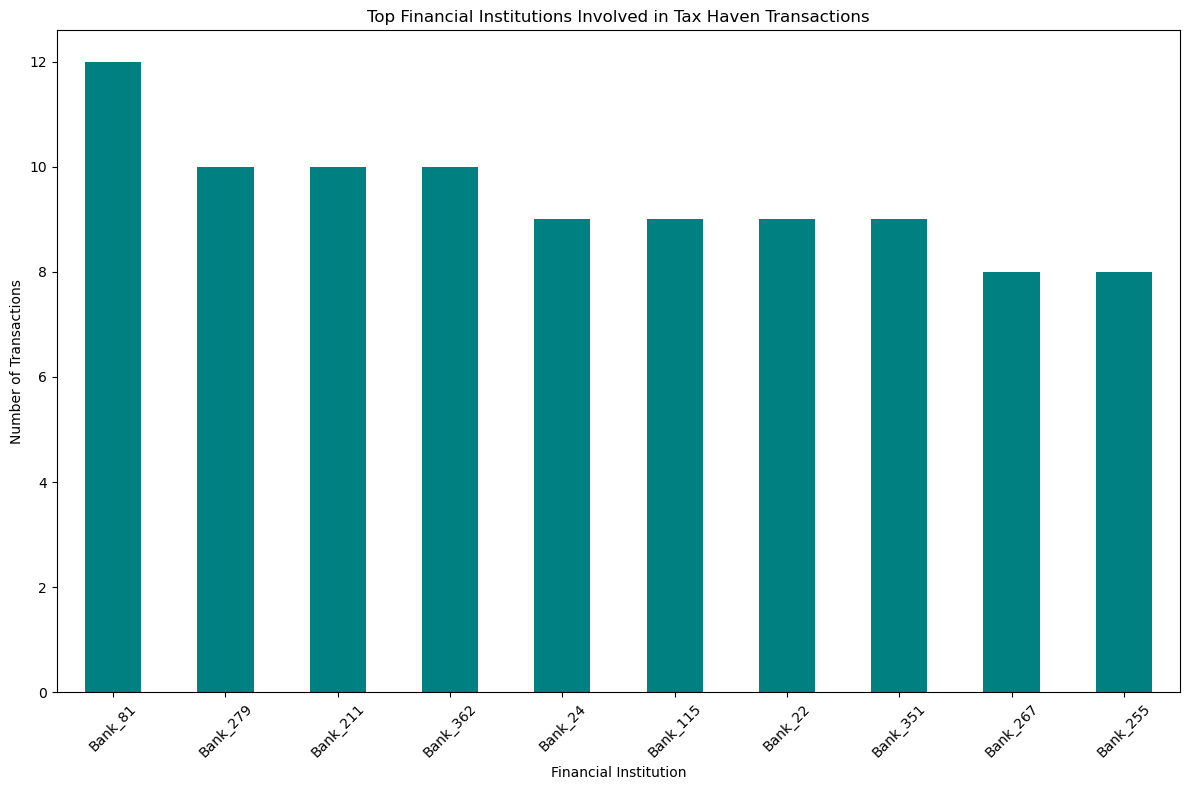

In [242]:
tax_haven_transactions = df[df['Tax Haven Country'].notna()]
financial_institution_counts = tax_haven_transactions['Financial Institution'].value_counts()
print("Most Common Financial Institutions for Transactions Involving Tax Haven Countries:")
print(financial_institution_counts)

plt.figure(figsize=(12, 8))
financial_institution_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top Financial Institutions Involved in Tax Haven Transactions')
plt.xlabel('Financial Institution')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This analysis helps identify the key financial players involved in transactions linked to tax haven countries

# Which transaction type had the highest money laundering risk score?

Transaction type with the highest money laundering risk score: Cash Withdrawal
Highest money laundering risk score: 10


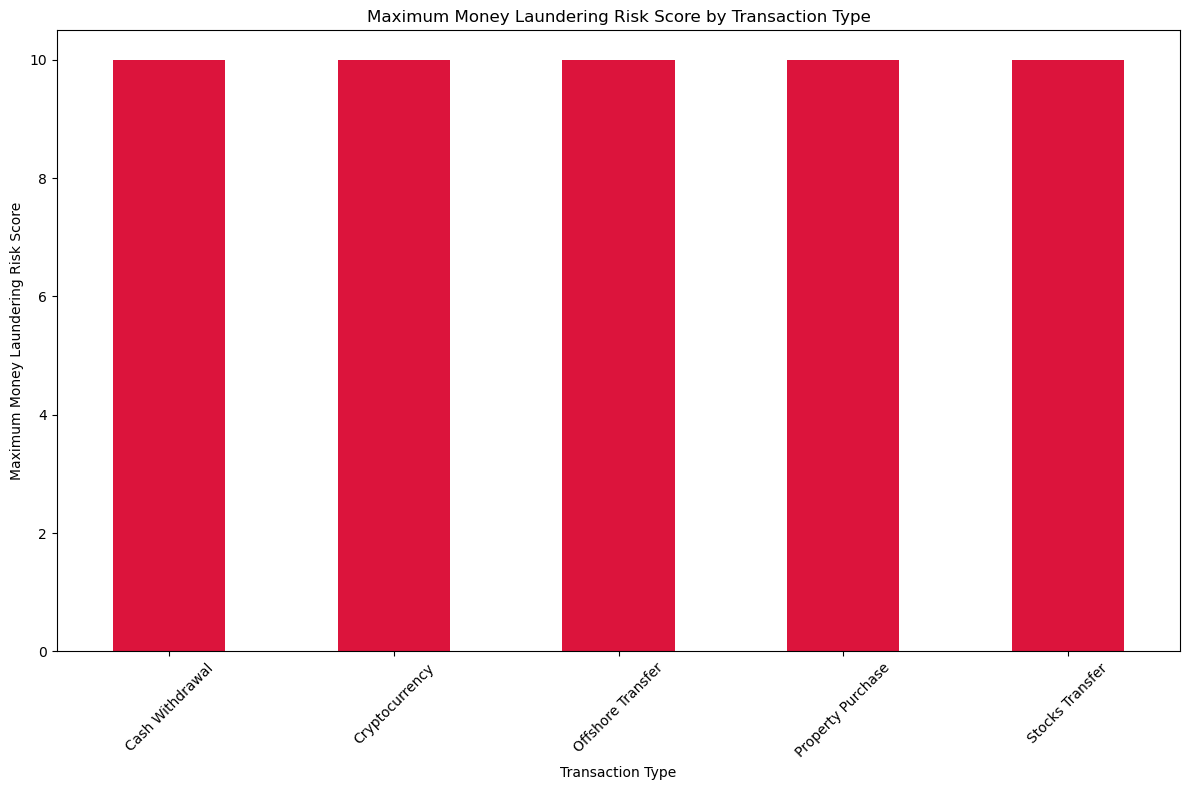

In [244]:

max_risk_by_transaction = df.groupby('Transaction Type')['Money Laundering Risk Score'].max()
highest_risk_transaction = max_risk_by_transaction.idxmax()
highest_risk_score = max_risk_by_transaction.max()
print(f"Transaction type with the highest money laundering risk score: {highest_risk_transaction}")
print(f"Highest money laundering risk score: {highest_risk_score}")

plt.figure(figsize=(12, 8))
max_risk_by_transaction.sort_values(ascending=False).plot(kind='bar', color='crimson')
plt.title('Maximum Money Laundering Risk Score by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Maximum Money Laundering Risk Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 





This analysis will help pinpoint specific transaction types that pose the greatest money laundering risk, providing valuable insights for monitoring and regulatory actions.

1. **Detailed Industry analysis:** The analysis reveals that finance, luxury goods, and construction are the top industries involved in transactions, indicating their susceptibility to financial irregularities. High-value sectors like real estate and casinos also play significant roles, suggesting they are common targets for money laundering. Enhanced oversight in these industries could help mitigate associated risks.

2. **Pattern analysis:** Offshore transfers are the most frequently used transaction method, highlighting a preference for moving money internationally. Property purchases, cash withdrawals, and cryptocurrencies also see substantial use, indicating popular channels for large transactions. These trends underscore the need for stricter oversight of cross-border financial activities.

3. **Risk analysis:** The **UK**, **Switzerland**, and **Singapore** have the highest average money laundering risk scores, indicating that transactions originating from these countries may pose a higher financial crime threat. Conversely, **India** and **China** show the lowest average scores, suggesting relatively lower risk. This highlights the importance of targeted financial scrutiny and regulation in countries with higher risk averages. 

4. **Sources of Fund analysis:** The dataset indicates a significant disparity, with 1401 illegal transactions compared to 599 legal transactions. This suggests that  the visual representation effectively highlights the imbalance between the two categories of transaction sources, indicating a greater prevalence of transactions originating from illegal source 

5. **Patern analysi:** The analysis reveals that certain countries engage more frequently in transactions involving tax havens, indicating potential financial risks. This pattern suggests that tax havens are strategically used by specific regions for asset management. Increased scrutiny on these countries could help mitigate illicit financial activities.

6. **Comparitive analysis:** The analysis shows that the **USA** has the highest total number of shell companies involved in transactions, followed closely by **Brazil** and the **UK**. The **USA** and **Switzerland** also have the highest average number of shell companies per transaction, indicating a possible preference for using multiple shell entities in financial activities. This highlights the importance of monitoring shell companies to combat money laundering and financial crime. 

7. **Source of Funds analysis:** The total transaction value from **illegal sources** is approximately **$2.5 million USD**, while transactions from **legal sources** slightly surpass this at **$2.63 million USD**. This close proximity in transaction amounts suggests that both legal and illegal financial activities are moving significant sums, making it challenging to differentiate between legitimate and illicit operations. Enhanced scrutiny and monitoring are crucial for identifying and regulating high-risk transactions.

8. **Geographical analysis:** The analysis indicates that the **UK** has the highest number of flagged transactions (57), followed by **China** (50) and **Singapore** (46). These numbers suggest that certain countries are more frequently associated with suspicious or high-risk activities, warranting closer scrutiny

9. **Financial Institutions analysis:** The data reveals that Bank_81 is the most frequently used financial institution for transactions involving tax haven countries, with a total of 12 occurrences. Other banks like Bank_279, Bank_211, and Bank_362 are also common, each appearing 10 times. This suggests that a select group of financial institutions may be more involved in handling transactions with potential tax avoidance implications.

10. **Risk analysis:** The transaction type with the highest money laundering risk score is Cash Withdrawal, reaching a maximum risk score of 10. This suggests that cash withdrawals are particularly vulnerable to misuse for illicit purposes, likely due to the ease of concealing the origin and destination of funds.

# Conclusion

The analysis highlights that certain industries, countries, and transaction methods are at higher risk for financial crimes like money laundering. Finance, luxury goods, and construction are particularly vulnerable sectors, while the UK, Switzerland, and Singapore show elevated risk levels. Offshore transfers, cash withdrawals, and the use of tax havens are common patterns, pointing to a need for tighter regulatory oversight. Effective monitoring of high-risk areas and institutions is crucial to differentiating between legitimate and illicit financial activities, ultimately helping to mitigate financial crime.